In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('b_c_d.csv')
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
x = data.drop(['diagnosis'],axis = 1).values
y = data['diagnosis'].values.reshape(-1,1)

In [3]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 42)
input_size = x_train.shape[1]
hidden_size = 100
output_size = 1

In [33]:
def initialize_parameters(input_size,hidden_size,output_size):
    np.random.seed(42)
    w1 = np.random.randn(input_size,hidden_size)*0.01
    b1 = np.zeros((1,hidden_size))
    w2 = np.random.randn(hidden_size,output_size)*0.01
    b2 = np.zeros((1,output_size))
    return w1,b1,w2,b2

In [11]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def sigmoid_derivative(z):
    return z*(1-z)
def relu(z):
    return np.maximum(0,z)
def relu_derivative(z):
    return np.where(z>0,1,0)

In [13]:
def forward_propagation(x,w1,b1,w2,b2):
    z1 = np.dot(x,w1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1,w2) + b2
    a2 = relu(z2)
    return z1,a1,z2,a2

In [41]:
def binary_cross_entropy(y,a2):
    a2 = np.clip(a2, 1e-10, 1 - 1e-10)
    bce = np.mean(-(y*np.log(a2) + (1-y)*np.log(1-a2)))
    return bce

In [17]:
def backward_propagation(x,y,z1,a1,a2,w2):
    m = x.shape[0]
    dz2 = a2 - y
    dw2 = (1/m) * np.dot(a1.T,dz2)
    db2 = (1/m) * np.sum(dz2, axis = 0)

    da1 = np.dot(dz2,w2.T)
    dz1 = da1 * relu_derivative(z1)
    dw1 = (1/m) * np.dot(x.T,dz1)
    db1 = (1/m) * np.sum(dz1, axis = 0)

    return dw1,db1,dw2,db2

In [19]:
def update_parameters(w1,b1,w2,b2,dw1,db1,dw2,db2,learning_rate):
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    return w1,b1,w2,b2

In [111]:
def train_model(x,y,learning_rate,epochs):
    input_size = x.shape[1]
    hidden_size = 100
    output_size = 1
    costs = []
    w1,b1,w2,b2 = initialize_parameters(input_size,hidden_size,output_size)
    for i in range(1,epochs+1):
        z1,a1,z2,a2 = forward_propagation(x,w1,b1,w2,b2)
        cost = binary_cross_entropy(y,a2)
        costs.append(cost)
        dw1,db1,dw2,db2 = backward_propagation(x,y,z1,a1,a2,w2)
        w1,b1,w2,b2 = update_parameters(w1,b1,w2,b2,dw1,db1,dw2,db2,learning_rate)
        if i == 1 or i%100 == 0:
            print('Cost at ',i,' epoch = ',cost)
    return costs

In [113]:
costs = train_model(x_train,y_train,learning_rate = 2,epochs = 1000)

Cost at  1  epoch =  9.60883405318576
Cost at  100  epoch =  0.039343933585217386
Cost at  200  epoch =  0.022117206917947503
Cost at  300  epoch =  0.00790879658386021
Cost at  400  epoch =  0.003439136934771043
Cost at  500  epoch =  0.0019367814471528157
Cost at  600  epoch =  0.0009027489564200009
Cost at  700  epoch =  0.0007445904297509453
Cost at  800  epoch =  0.0007145250761291149
Cost at  900  epoch =  0.0006375258797728899
Cost at  1000  epoch =  0.0005593439269929056


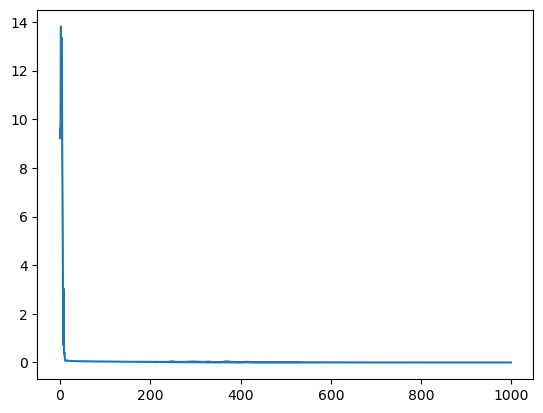

In [119]:
t = np.arange(0,1000)
plt.plot(t,costs)
plt.show()